### 导入库

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
%matplotlib inline

### 定义函数获取数据集的路径列表与标签列表

In [6]:
def get_files(file_dir):
    image_list = []
    label_list = []
    for i in range(2):
        for file in os.listdir(file_dir + "/{}".format(i)):              
            image_list.append(file_dir + "/{}".format(i) + "/"+ file)    
            label_list.append(i)
    temp = np.array([image_list, label_list])
    temp = temp.transpose()
    np.random.shuffle(temp)
    image_list = list(temp[:, 0])
    label_list = list(temp[:, 1].astype(np.int))
    return image_list, label_list

### 读取训练集/测试集的路径列表和标签列表
**数据集文件夹命名方式：**test文件夹下包含2个子文件夹，分别命名0-1，对应2个类别，每个子文件夹包含7张图片。train文件夹下包含2个子文件夹，分别命名0-1，对应2个类别，每个子文件夹包含16张图片。

In [7]:
test_dir = "/home/gavin/create_hdf5_dataset/datasets/cifar10/test"
train_dir = "/home/gavin/create_hdf5_dataset/datasets/cifar10/train"
test_image_list, test_label_list = get_files(test_dir)
train_image_list, train_label_list = get_files(train_dir)

### 定义标签对应的类别

In [8]:
classes_list = [b'off',b'on']

### 将所有测试集图片转换为numpy数组

In [10]:
test_image = np.zeros((len(test_image_list),591,260,3))
test_label = np.zeros((len(test_label_list),1))
for i in range(len(test_image_list)):
    test_image[i] = np.array(mpimg.imread(test_image_list[i]))
    test_label[i] = np.array(test_label_list[i])

### 将所有训练集图片转换为numpy数组

In [11]:
train_image = np.zeros((len(train_image_list),591,260,3))
train_label = np.zeros((len(train_label_list),1))
for i in range(len(train_image_list)):
    train_image[i] = np.array(mpimg.imread(train_image_list[i]))
    train_label[i] = np.array(train_label_list[i])

### 将测试集数据存储到h5文件

In [12]:
f = h5py.File("test_cifar10.h5", "w")
f.create_dataset("X_test", data=test_image, dtype=np.uint8)
f.create_dataset("y_test", data=test_label, dtype=np.uint8)
f.create_dataset("classes_list", data=classes_list)
f.close()

### 将训练集数据存储到h5文件

In [13]:
f = h5py.File("train_cifar10.h5", "w")
f.create_dataset("X_train", data=train_image, dtype=np.uint8)
f.create_dataset("y_train", data=train_label, dtype=np.uint8)
f.create_dataset("classes_list", data=classes_list)
f.close()

### 导入数据集

In [14]:
def load_dataset():
    train_dataset = h5py.File('train_cifar10.h5', "r")
    train_set_x_orig = np.array(train_dataset["X_train"][:])
    train_set_y_orig = np.array(train_dataset["y_train"][:])

    test_dataset = h5py.File('test_cifar10.h5', "r")
    test_set_x_orig = np.array(test_dataset["X_test"][:])
    test_set_y_orig = np.array(test_dataset["y_test"][:])

    classes = np.array(test_dataset["classes_list"][:])
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [15]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### 打印数据集各个参数的大小

In [16]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)
print(classes.shape)

(50, 591, 260, 3)
(50, 1)
(18, 591, 260, 3)
(18, 1)
(2,)


### 数据集测试与部分数据可视化

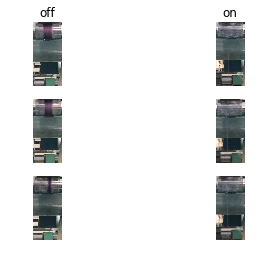

In [18]:
list_classes = []
for i in range(2):
    list_classes.append(classes[i].decode('utf-8'))
num_classes = len(list_classes)
num_each_class = 3
for y, cls in enumerate(list_classes):
    idxs = np.flatnonzero(train_set_y == y)
    idxs = np.random.choice(idxs, num_each_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + (y + 1)
        plt.subplot(num_each_class, num_classes, plt_idx)
        plt.imshow(train_set_x_orig[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()